In [60]:
import pandas as pd
import os
import glob
import numpy as np
import geojson

In [174]:
path = '../Facebook/Nigeria/movement_tile/'
paths = os.path.join(path, "*.csv")
all_files = glob.glob(paths)
df = pd.concat((pd.read_csv(f) for f in all_files))
df['start_quadkey'] = df.start_quadkey.astype('int')
df['end_quadkey'] = df.end_quadkey.astype('int')
#df = df.reset_index()
city = 'Lagos'

In [195]:
df[df.end_polygon_name == 'Federal Capital Territory']

,geometry,date_time,start_polygon_id,start_polygon_name,end_polygon_id,end_polygon_name,length_km,tile_size,country,level,...,end_lat,end_lon,start_quadkey,end_quadkey,start_adm1,start_adm2,start_adm3,end_adm1,end_adm2,end_adm3
750,"LINESTRING (4.5263671875 8.450636350576481, 7....",2020-05-04 0800,648717.0,Kwara,648695.0,Federal Capital Territory,335.296351,12.0,NG,LEVEL3,...,9.058700,7.514648,122220132233,122221032101,Kwara,Asa,Wara,FCT,Municipal Area Council,Iddah
756,"LINESTRING (4.5263671875 8.537562876596859, 7....",2020-05-04 0800,648717.0,Kwara,648695.0,Federal Capital Territory,333.444168,12.0,NG,LEVEL3,...,9.058700,7.514648,122220132231,122221032101,Kwara,Ilorin West,Wara,FCT,Municipal Area Council,Iddah
784,"LINESTRING (4.6142578125 8.450636350576481, 7....",2020-05-04 0800,648717.0,Kwara,648695.0,Federal Capital Territory,325.841578,12.0,NG,LEVEL3,...,9.058700,7.514648,122220132322,122221032101,Kwara,Ilorin East,Wara,FCT,Municipal Area Council,Iddah
1571,LINESTRING (6.987304687499999 9.05869953607351...,2020-05-04 0800,648695.0,Federal Capital Territory,648695.0,Federal Capital Territory,0.000000,12.0,NG,LEVEL3,...,9.058700,6.987305,122221023111,122221023111,FCT,Gwagwalada,Iddah,FCT,Gwagwalada,Iddah
1622,LINESTRING (6.987304687500001 8.79822291162237...,2020-05-04 0800,648695.0,Federal Capital Territory,648695.0,Federal Capital Territory,0.000000,12.0,NG,LEVEL3,...,8.798223,6.987305,122221023133,122221023133,FCT,Kwali,Iddah,FCT,Kwali,Iddah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,LINESTRING (7.602539062500001 9.05869953607351...,2020-05-28 0800,648719.0,Nassarawa,648695.0,Federal Capital Territory,9.651114,12.0,NG,LEVEL3,...,9.058700,7.514648,122221032110,122221032101,Nassarawa,Karu,NaN,Federal Capital Territory,Bwari,NaN
2201,LINESTRING (7.690429687500001 8.97189469804303...,2020-05-28 0800,648719.0,Nassarawa,648695.0,Federal Capital Territory,30.523174,12.0,NG,LEVEL3,...,9.058700,7.426758,122221032113,122221032100,Nassarawa,Karu,NaN,Federal Capital Territory,AbujaMun,NaN
2202,LINESTRING (7.690429687500001 8.97189469804303...,2020-05-28 0800,648719.0,Nassarawa,648695.0,Federal Capital Territory,19.306867,12.0,NG,LEVEL3,...,8.971895,7.514648,122221032113,122221032103,Nassarawa,Karu,NaN,Federal Capital Territory,AbujaMun,NaN
2203,LINESTRING (7.690429687500001 8.97189469804303...,2020-05-28 0800,648719.0,Nassarawa,648695.0,Federal Capital Territory,21.583143,12.0,NG,LEVEL3,...,9.058700,7.514648,122221032113,122221032101,Nassarawa,Karu,NaN,Federal Capital Territory,Bwari,NaN


In [193]:
set(df.end_polygon_name)

{'Abia',
 'Adamawa',
 'Akwa Ibom',
 'Anambra',
 'Bauchi',
 'Bayelsa',
 'Benue',
 'Borno',
 'Cross River',
 'Delta',
 'Ebonyi',
 'Edo',
 'Ekiti',
 'Enugu',
 'Federal Capital Territory',
 'Gombe',
 'Imo',
 'Jigawa',
 'Kaduna',
 'Kano',
 'Katsina',
 'Kebbi',
 'Kogi',
 'Kwara',
 'Lagos',
 'Nassarawa',
 'Niger',
 'Ogun',
 'Ondo',
 'Osun',
 'Oyo',
 'Plateau',
 'Rivers',
 'Sokoto',
 'Taraba',
 'Yobe',
 'Zamfara'}

In [199]:
#nairobi_df = df[(df.start_polygon_name == city) & (df.end_polygon_name == city)]
nairobi_df = df
nairobi_df = nairobi_df[(nairobi_df.start_quadkey != nairobi_df.end_quadkey)]

unique_tiles = nairobi_df.groupby(['end_polygon_name','end_quadkey'])[['end_lat','end_lon']].count().reset_index()

# TODO: not all tiles are guaranteed 
# set(nairobi_df.start_quadkey.to_list() + nairobi_df.start_quadkey.to_list())

unique_tiles.

,end_polygon_name,end_quadkey,end_lat,end_lon
0,Abia,122223010033,1,1
1,Abia,122223010100,218,218
2,Abia,122223010101,351,351
3,Abia,122223010102,123,123
4,Abia,122223010103,377,377
...,...,...,...,...
590,Zamfara,122203202323,66,66
591,Zamfara,122203203232,131,131
592,Zamfara,122203203233,117,117
593,Zamfara,122203221211,168,168


In [155]:
unique_tiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   start_quadkey  26 non-null     int64  
 1   end_lat        26 non-null     float64
 2   end_lon        26 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 752.0 bytes


In [ ]:
coords = np.dstack(polygon.boundary.coords.xy).tolist()
        all_coords.append(*coords)

In [172]:
import shapely
import geopandas as gp
from shapely.geometry import shape, LineString
import json

import pandas as pd
import os
import glob
import numpy as np
import geojson

dicts = []

for idx, row in unique_tiles.iterrows():

    lat = row.lat
    lng = row.lon
    size = 0.01

    # create geodataframe with some variables
    gf = gp.GeoDataFrame({'lat': lat, 'lon': lng, 'width': size, 'height': size}, index=[1], crs="epsg:4326")

    # create center as a shapely geometry point type and set geometry of dataframe to this
    gf['center'] = gf.apply(lambda x: shapely.geometry.Point(x['lon'], x['lat']), axis=1)
    gf = gf.set_geometry('center')

    # create polygon using width and height
    gf['center'] = shapely.geometry.box(*gf['center'].buffer(1).total_bounds)
    gf['polygon'] = gf.apply(lambda x: shapely.affinity.scale(x['center'], x['width'], x['height']), axis=1)
    gf = gf.set_geometry('polygon')
    geopoly = gf['polygon'].to_json()

    g1 = geojson.loads(geopoly)
    gh = g1[0].geometry
    g2 = shape(gh)

    # Create GeoJSON
    wow3 = geojson.dumps(g2)
    wow4 = json.loads(wow3)

    gd_feat = dict(kommune="A"+str(int(row.start_quadkey)), polygons=wow4['coordinates'])
    dicts.append(gd_feat)

In [173]:
dicts

[{'kommune': 'A1222202313310',
  'polygons': [[[2.756582, 6.458151],
    [2.756582, 6.478151],
    [2.736582, 6.478151],
    [2.736582, 6.458151],
    [2.756582, 6.458151]]]},
 {'kommune': 'A1222202313311',
  'polygons': [[[2.800527, 6.458151],
    [2.800527, 6.478151],
    [2.780527, 6.478151],
    [2.780527, 6.458151],
    [2.800527, 6.458151]]]},
 {'kommune': 'A1222202313312',
  'polygons': [[[2.756582, 6.414483],
    [2.756582, 6.434483],
    [2.736582, 6.434483],
    [2.736582, 6.414483],
    [2.756582, 6.414483]]]},
 {'kommune': 'A1222202313313',
  'polygons': [[[2.800527, 6.414483],
    [2.800527, 6.434483],
    [2.780527, 6.434483],
    [2.780527, 6.414483],
    [2.800527, 6.414483]]]},
 {'kommune': 'A1222203201232',
  'polygons': [[[3.283926, 6.676431],
    [3.283926, 6.696431],
    [3.263926, 6.696431],
    [3.263926, 6.676431],
    [3.283926, 6.676431]]]},
 {'kommune': 'A1222203201233',
  'polygons': [[[3.327871, 6.676431],
    [3.327871, 6.696431],
    [3.307871, 6.696431],

In [139]:
dist(*gd_feat['polygons'][0][0], *gd_feat['polygons'][0][1])



1782.4096048373901

In [137]:
# tiles with most data
df['start_coord_pair'] = pd.Series([(x[0], x[1]) for x in df[['start_lat','start_lon']].values])
df['end_coord_pair'] = pd.Series([(x[0], x[1]) for x in df[['end_lat','end_lon']].values])

In [47]:
set([(x[0], x[1]) for x in df[['start_lat','start_lon']].values])

{(-4.455950245301587, 39.48486328125),
 (-4.368320100898302, 39.44091796875),
 (-4.324501176226441, 39.52880859374999),
 (-4.324501176226441, 39.57275390625),
 (-4.280679717213835, 39.57275390625),
 (-4.236855749349317, 39.57275390625),
 (-4.193029298129042, 39.44091796875),
 (-4.193029298129042, 39.57275390625),
 (-4.149200389056404, 39.30908203125),
 (-4.105369047641993, 39.61669921875),
 (-4.105369047641993, 39.66064453125),
 (-4.061535299403523, 39.61669921874999),
 (-4.061535299403523, 39.66064453125),
 (-4.017699169865736, 39.57275390625001),
 (-4.017699169865736, 39.61669921875),
 (-4.017699169865736, 39.66064453125),
 (-4.017699169865736, 39.70458984375),
 (-3.9738606845603215, 39.52880859375),
 (-3.9738606845603215, 39.57275390625001),
 (-3.9738606845603215, 39.70458984374999),
 (-3.9738606845603215, 39.74853515625),
 (-3.9300198690258616, 39.52880859375),
 (-3.9300198690258616, 39.57275390624999),
 (-3.9300198690258616, 39.74853515625),
 (-3.8861767488077623, 39.48486328125),

In [51]:
from shapely.geometry import Point
test = Point(3,5)
# buffer with CAP_STYLE = 3
buf = test.buffer(10, cap_style=3)
print(buf.wkt)

POLYGON ((13 15, 13 -5, -7 -5, -7 15, 13 15))


In [74]:
df['start_coord_pair'].value_counts()[:10]

(-1.2962760243536098, 36.80419921875)       5604
(-1.2962760243536098, 36.84814453125)       4482
(-1.25234158463892, 36.80419921875)         3573
(-1.2962760243536098, 36.89208984375)       3458
(-1.2084064084389183, 36.89208984375)       3034
(-1.2962760243536098, 36.76025390625)       2865
(-1.25234158463892, 36.89208984375)         2328
(-1.3402097017630936, 36.89208984375001)    2262
(-1.25234158463892, 36.84814453125)         2148
(-1.2084064084389183, 36.93603515624999)    2003
Name: start_coord_pair, dtype: int64

In [77]:
dist(-1.2962760243536098, 36.80419921875, -1.25234158463892, 36.80419921875)

Result: 4.886820402500799
Should be: 278.546 km


4.886820402500799

In [73]:
df[(df.start_coord_pair == (-1.2962760243536098, 36.80419921875)) & (df['start_coord_pair'] != df['end_coord_pair'])].start_lat

265      -1.296276
266      -1.296276
267      -1.296276
268      -1.296276
269      -1.296276
            ...   
170950   -1.296276
170951   -1.296276
170952   -1.296276
170953   -1.296276
170954   -1.296276
Name: start_lat, Length: 5397, dtype: float64

In [169]:
x

In [78]:
import folium
from folium.plugins import BeautifyIcon

# Make an empty map
m = folium.Map(location=[15, 0], tiles="OpenStreetMap", zoom_start=2)

# square marker
icon_square = BeautifyIcon(
    icon_shape='rectangle-dot', 
    border_color='red', 
    border_width=10,
)
folium.Marker([50, -70], tooltip='square', icon=icon_square).add_to(m)

# circle marker
icon_circle = BeautifyIcon(
    icon_shape='circle-dot', 
    border_color='green', 
    border_width=10,
)
folium.Marker([-20, 25], tooltip='circle', icon=icon_circle).add_to(m)

# star marker
icon_star = BeautifyIcon(
    icon='star',
    inner_icon_style='color:blue;font-size:30px;',
    background_color='transparent',
    border_color='transparent',
)

folium.Marker([60, 125], tooltip='star', icon=icon_star).add_to(m)

m.save('markers_on_folium_map.html')

In [301]:
m

In [103]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [249]:
fp = "kenyan-counties/County.shp"
map_df = gpd.read_file(fp)

In [250]:
nairobi = map_df[map_df.COUNTY == 'Nairobi']

In [161]:
nairobi_df.n_difference

175         17.5
176       1027.7
177         16.5
178         -1.5
179        -18.5
           ...  
171182      15.5
171183     283.7
171184      18.5
171207      37.5
171227     166.5
Name: n_difference, Length: 46014, dtype: float64

In [191]:
lat1 = 52.2296756
lon1 = 21.0122287

In [122]:
from math import sin, cos, sqrt, atan2, radians, degrees

def dist(lat1, lon1, lat2, lon2):

    # approximate radius of earth in km
    R = 6378137

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [224]:
dist(lat1, lon1, *add_dist(lat1, lon1, 1))

57.29577951277219

In [304]:
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = add_dist(coords_1[0], coords_1[1], 300)

geopy.distance.vincenty(coords_1, coords_2).m

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


17181.582476725656

In [235]:
def add_dist(lat1, lon1, m):
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat = lat1 + (180/np.pi)*(m/6378137)
    lon = lon1 + (180/np.pi)*(0/6378137)/np.cos(lat1)
    
    return degrees(lat), degrees(lon)

In [165]:
from shapely.geometry import Polygon


In [ ]:
def square(lon, lat):
    dist

In [167]:
coords = ((0., 0.), (0., 1.), (1., 1.), (1., 0.), (0., 0.))

In [168]:
s = geopandas.GeoSeries([Polygon(coords)])
s

0    POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....
dtype: geometry

In [ ]:
nairobi_df = df[(df.start_polygon_name == 'Nairobi') & (df.end_coord_pair == (-1.2962760243536098, 36.80419921875))]

In [260]:
nairobi_df = df[(df.start_polygon_name == 'Nairobi') & (df.end_coord_pair == (-1.2962760243536098, 36.80419921875))]

In [315]:
plot_df1 = nairobi_df.groupby('start_coord_pair').n_difference.mean().reset_index()
plot_df = pd.DataFrame(plot_df1.start_coord_pair.tolist(), index=plot_df1.index) 
plot_df['n_diff'] = plot_df1.n_difference
plot_df = plot_df.drop(9)

In [318]:
plot_df

,start_coord_pair,n_difference
0,"(-1.384142591049674, 36.76025390625)",-7.314180
1,"(-1.3402097017630936, 36.71630859375)",-3.035516
2,"(-1.3402097017630936, 36.76025390625)",-2.553704
3,"(-1.3402097017630936, 36.80419921875)",7.565164
4,"(-1.3402097017630936, 36.84814453124999)",-12.230191
5,"(-1.3402097017630936, 36.89208984375001)",-2.650678
6,"(-1.3402097017630936, 36.93603515625)",-5.232824
7,"(-1.2962760243536098, 36.71630859375)",3.196982
8,"(-1.2962760243536098, 36.76025390625)",-3.959367
9,"(-1.2962760243536098, 36.80419921875)",1436.653516


In [316]:
gdf = geopandas.GeoDataFrame(
    plot_df, geometry=geopandas.points_from_xy(plot_df.iloc[:,1], plot_df.iloc[:,0]))

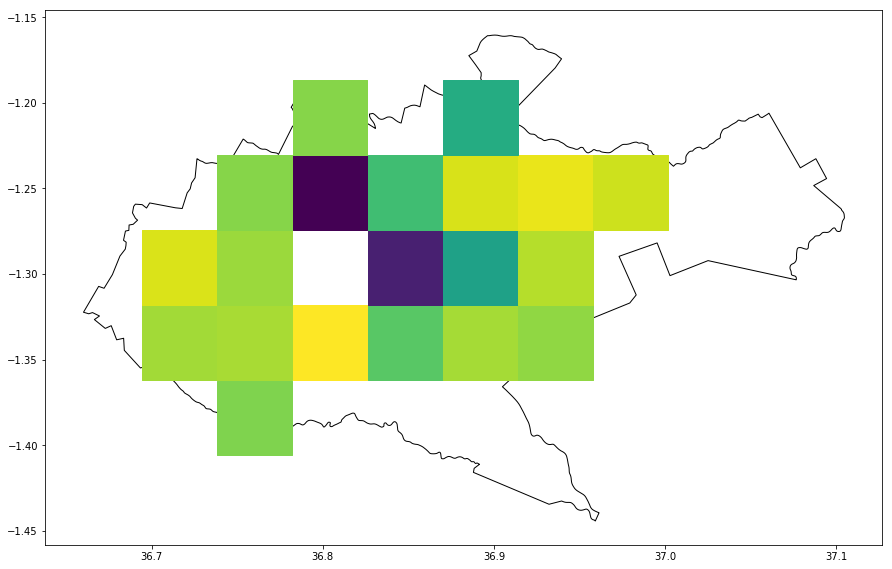

In [329]:
ax = nairobi.plot(figsize=(15,15), color='white', edgecolor='black')
gdf.plot(ax = ax, c=plot_df['n_diff'], marker = "s", markersize=5600)

In [226]:
gdf = geopandas.GeoDataFrame(
    nairobi_df, geometry=geopandas.points_from_xy(nairobi_df.start_lon, nairobi_df.start_lat))

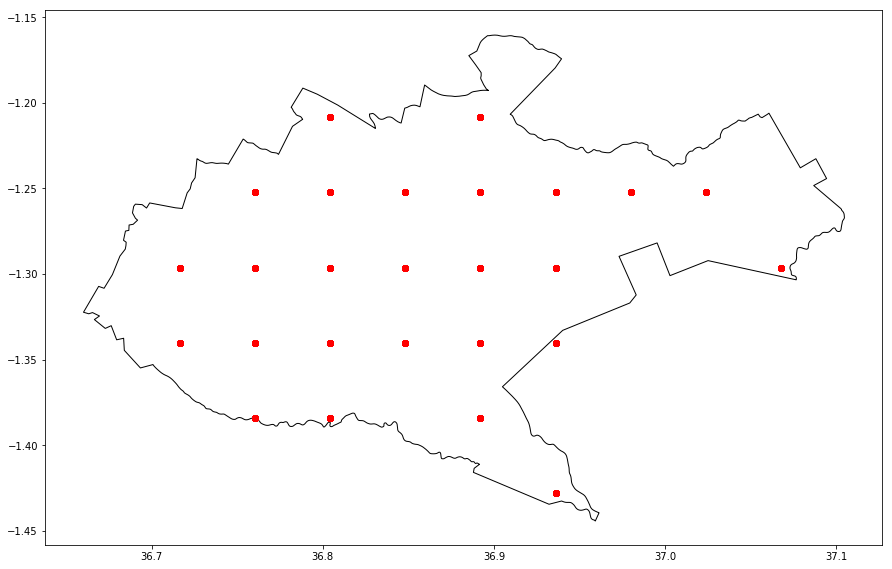

In [252]:
ax = nairobi.plot(figsize=(15,15), color='white', edgecolor='black')
gdf.plot(ax = ax, color='red')

In [ ]:
geodf = gpd.GeoDataFrame.from_features(collection, crs=collection.crs)
geodf.geometry = geodf.geometry.simplify(0.01)

In [ ]:
gadm36_KEN_shp

In [346]:
df_places = gpd.read_file('gadm36_KEN_shp/gadm36_KEN_2.shp')

In [347]:
df_places

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.1_1,805,None,None,Constituency,Constituency,162,None,"POLYGON ((35.87727 -0.02973, 35.87699 -0.02947..."
1,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.2_1,Baringo Central,None,None,Constituency,Constituency,159,None,"POLYGON ((35.80651 0.31642, 35.80780 0.31627, ..."
2,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.3_1,Baringo North,None,None,Constituency,Constituency,158,None,"POLYGON ((35.81394 0.60442, 35.81377 0.60363, ..."
3,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.4_1,Baringo South,None,None,Constituency,Constituency,160,None,"POLYGON ((36.25757 0.38328, 36.25766 0.38242, ..."
4,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.5_1,Eldama Ravine,None,None,Constituency,Constituency,162,None,"POLYGON ((35.84734 -0.07654, 35.84637 -0.07804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,KEN,Kenya,KEN.47_1,West Pokot,None,KEN.47.2_1,Kapenguria,None,None,Constituency,Constituency,129,None,"MULTIPOLYGON (((35.35352 1.65473, 35.35364 1.6..."
297,KEN,Kenya,KEN.47_1,West Pokot,None,KEN.47.3_1,Pokot South,None,None,Constituency,Constituency,132,None,"POLYGON ((35.47385 1.00621, 35.47345 1.00622, ..."
298,KEN,Kenya,KEN.47_1,West Pokot,None,KEN.47.4_1,Sigor,None,None,Constituency,Constituency,130,None,"POLYGON ((35.59382 1.28579, 35.59303 1.28596, ..."
299,KEN,Kenya,KEN.47_1,West Pokot,None,KEN.47.5_1,unknown 3,None,None,Constituency,Constituency,0,None,"POLYGON ((35.15631 1.49415, 35.15616 1.49424, ..."
